In [4]:
def show2imgs(im1, im2, title1='Obraz pierwszy', title2='Obraz drugi', size=(10,10)):
    
    import matplotlib.pyplot as plt
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=size)
    ax1.imshow(im1, cmap='gray')
#     ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(im2, cmap='gray')
#     ax2.axis('off')
    ax2.set_title(title2)
    plt.show()

### Segmentacja

Technika izolowania części obrazu przeznaczonych do dalszego przetwarzania i obróbki. Zwykle połączona z etapem **indeksacji** czyli oznaczania tych wydzielonych obszarów unikalnymi etykietami lub numerami.

#### Algorytm zalewania obszarów

Algorytm zalewania (ang. *flood fill*) jest wariantem segmentacji poprzez rozrost obszarów.

(303, 384) (305, 386) uint8
(303, 384)


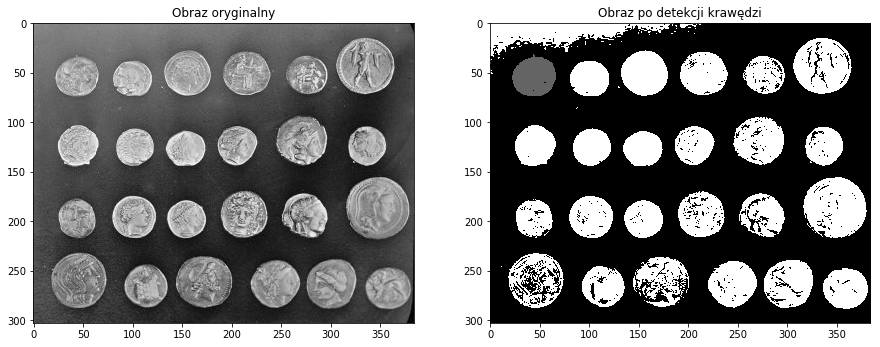

0 255


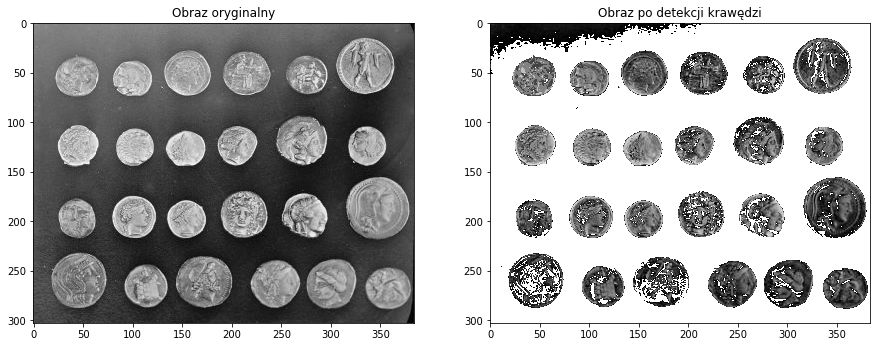

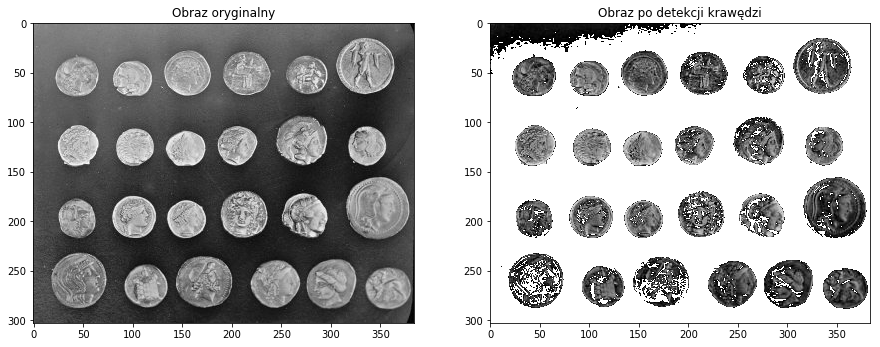

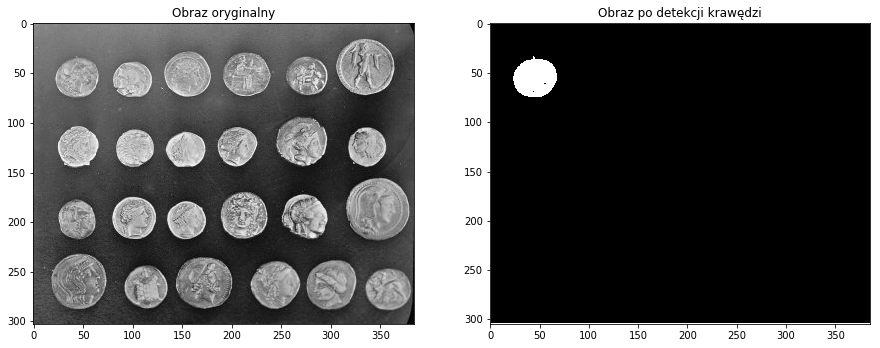

0 1 uint8


In [5]:
import cv2
from skimage import data
import numpy as np

im = data.coins()

th = 120
th, bim = cv2.threshold(im, th, 255, cv2.THRESH_BINARY);
cim = bim.copy()

h, w = im.shape
mask = np.zeros((h+2, w+2), dtype='uint8')
print(im.shape, mask.shape, im.dtype)

cv2.floodFill(cim, mask = mask, seedPoint=(50, 50), newVal=100, loDiff = 10, upDiff = 10)

print(im.shape)
show2imgs(im, cim, title1='Obraz oryginalny', title2='Obraz po detekcji krawędzi', size=(15,15))
print(cim.min(), cim.max())

cim_inv = cv2.bitwise_not(cim)
fill_image = im | cim_inv
show2imgs(im, fill_image, title1='Obraz oryginalny', title2='Obraz po detekcji krawędzi', size=(15,15))

bim_inv = cv2.bitwise_not(bim)
fill_image = im | bim_inv
show2imgs(im, fill_image, title1='Obraz oryginalny', title2='Obraz po detekcji krawędzi', size=(15,15))

show2imgs(im, mask, title1='Obraz oryginalny', title2='Obraz po detekcji krawędzi', size=(15,15))
print(mask.min(), mask.max(), mask.dtype)

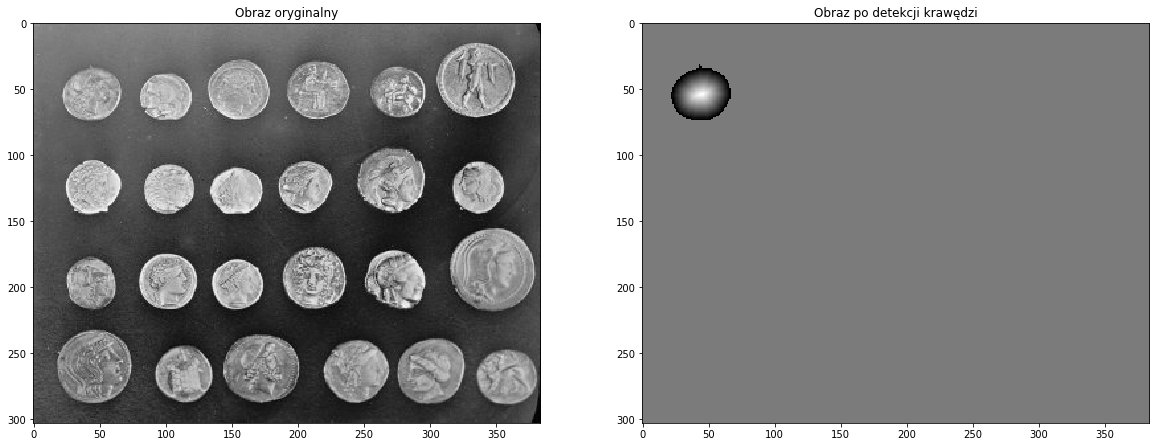

In [6]:
from skimage import segmentation

element = np.ones((3,3),np.uint8)
mbim2 = cv2.erode(bim, kernel=element, iterations=0)
# show2imgs(bim, mbim2, title1='Obraz oryginalny', title2='Obraz po przekształceniu', size=(10,10))

im_border = segmentation.clear_border(mbim2, buffer_size=1)
# show2imgs(bim, im_border, title1='Obraz oryginalny', title2='Obraz po przekształceniu', size=(10,10))

element = np.ones((3,3),np.uint8)
mbim2 = cv2.morphologyEx(im_border, op=cv2.MORPH_CLOSE, kernel=element, iterations=3)
# show2imgs(bim, im_border, title1='Obraz oryginalny', title2='Obraz po przekształceniu', size=(10,10))

dt = cv2.distanceTransform(mbim2, distanceType=cv2.DIST_L2, maskSize=cv2.DIST_MASK_PRECISE)
# show2imgs(bim, dt, title1='Obraz oryginalny', title2='Obraz po przekształceniu', size=(10,10))

cv2.floodFill(dt, mask = mask, seedPoint= (0,0), newVal=10, loDiff = 20, upDiff = 20)
show2imgs(im, dt, title1='Obraz oryginalny', title2='Obraz po detekcji krawędzi', size=(20,20))